In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df=pd.read_csv("Social_Network_ads.csv")
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [43]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [45]:
df.drop("Gender",axis=1,inplace=True)

In [47]:
x=df.iloc[:,:-1]
y=df["Purchased"]

In [49]:
from sklearn.preprocessing import StandardScaler

In [57]:
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)

In [59]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)

DecisionTreeClassifier()

In [101]:
dc.score(x_test,y_test)*100

87.5

In [79]:
from sklearn.tree import plot_tree

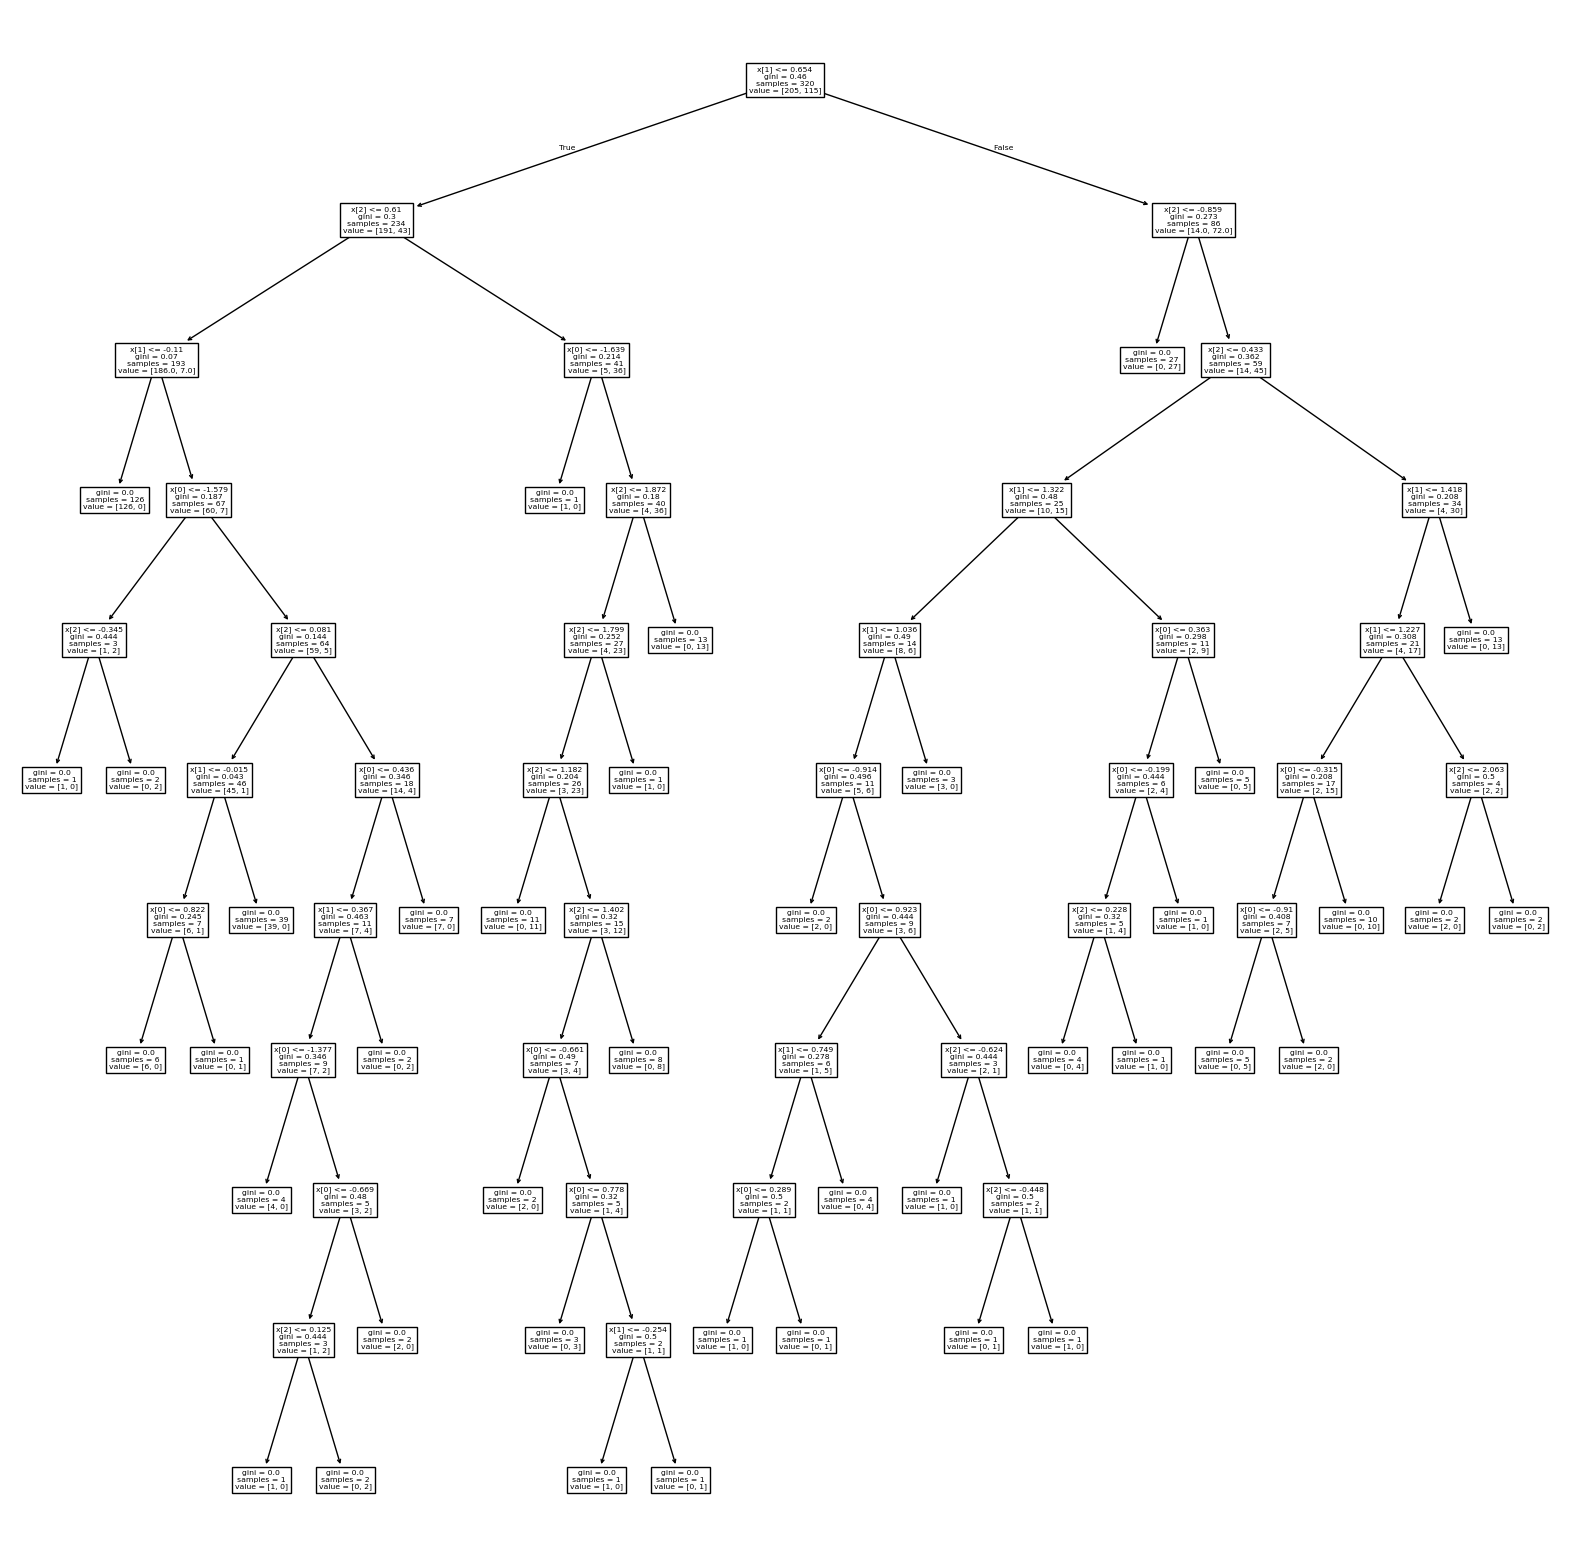

In [83]:
plt.figure(figsize=(20,20))
plot_tree(dc)
plt.show()

In [85]:
dc1=DecisionTreeClassifier(criterion= "entropy")
dc1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [87]:
dc1.score(x_test,y_test)*100

86.25

In [113]:
# from mlxtend.plotting import plot_decision_regions
# plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dc)
# plt.show()

# Pre prunning

In [124]:
dc2=DecisionTreeClassifier(max_depth=3)
dc2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [126]:
dc2.score(x_test,y_test)*100

91.25

# Post prunning

In [122]:
for i in range(1,20):
    dt3=DecisionTreeClassifier(max_depth=i)
    dt3.fit(x_train,y_train)
    print(dt3.score(x_train,y_train),dt3.score(x_test,y_test),i)

0.821875 0.9 1
0.91875 0.9125 2
0.921875 0.9125 3
0.93125 0.9 4
0.940625 0.8875 5
0.95625 0.8875 6
0.978125 0.875 7
0.984375 0.8625 8
0.99375 0.875 9
1.0 0.8625 10
1.0 0.875 11
1.0 0.875 12
1.0 0.8625 13
1.0 0.875 14
1.0 0.8625 15
1.0 0.8625 16
1.0 0.875 17
1.0 0.875 18
1.0 0.8875 19
